In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import optimizers
import matplotlib.pyplot as plt

# For my Mac
os.chdir('//Users//patricklee//Desktop//파이썬//DACON//2020DACON_CUP')

# For my Desktop
# os.chdir('C://Users//BIS_COM//data//dacon//2020')

In [2]:
df = pd.read_csv(r'./new_train_df.csv', parse_dates=['c_time'])

In [3]:
df

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 01:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,19.0,9.0,259.0
1,2018-09-09 03:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,10.0,10.0,2.0,102.0
2,2018-09-09 13:00:00,3.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,16.0,7.0,131.0
3,2018-09-09 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,13.0,12.0,2.0,47.0
4,2018-09-09 21:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,17.0,17.0,7.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13454,2019-12-30 07:00:00,-99.0,-99.0,-99.0,1.0,1.0,1.0,1.0,12.0,14.0,3.0,72.0
13455,2019-12-30 08:00:00,-99.0,-99.0,-99.0,7.0,3.0,3.0,6.0,29.0,29.0,5.0,274.0
13456,2019-12-30 12:00:00,-99.0,-99.0,-99.0,16.0,5.0,4.0,16.0,58.0,59.0,18.0,624.0
13457,2019-12-30 15:00:00,-99.0,-99.0,-99.0,36.0,7.0,5.0,34.0,100.0,100.0,28.0,1196.0


In [4]:
df = df.set_index("c_time")

In [5]:
df

,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
c_time,,,,,,,,,,,
2018-09-09 01:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,19.0,9.0,259.0
2018-09-09 03:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,10.0,10.0,2.0,102.0
2018-09-09 13:00:00,3.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,16.0,7.0,131.0
2018-09-09 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,13.0,12.0,2.0,47.0
2018-09-09 21:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,17.0,17.0,7.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 07:00:00,-99.0,-99.0,-99.0,1.0,1.0,1.0,1.0,12.0,14.0,3.0,72.0
2019-12-30 08:00:00,-99.0,-99.0,-99.0,7.0,3.0,3.0,6.0,29.0,29.0,5.0,274.0
2019-12-30 12:00:00,-99.0,-99.0,-99.0,16.0,5.0,4.0,16.0,58.0,59.0,18.0,624.0


# baseline

In [6]:
epochs = 200
batch_size = 128
verbose = 1
nb_classes = 4
n_hidden = 128
validation_split = 0.2

rate = 0.2
rate_size = int(len(df) * rate)

train = df[:-rate_size]
test = df[-rate_size:]

In [7]:
x_col = train.columns[:7]
y_col = train.columns[7:]
print(x_col, y_col)

Index(['id', 'ds_level', 'country_code', 'Total visit', 'browser', 'platform',
       'Total User'],
      dtype='object') Index(['사용자', '세션', '신규방문자', '페이지뷰'], dtype='object')


In [8]:
X_train = train[x_col]
Y_train = train[y_col]
X_test = test[x_col]
Y_test = test[y_col]

In [9]:
print(X_train.shape, X_test.shape)

(10768, 7) (2691, 7)


In [10]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,), 
                             activation ='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(nb_classes,
                            activation='relu'))

In [11]:
model.compile(optimizer = 'SGD',
             loss = 'MSE',
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=epochs,
             verbose=verbose, validation_split=validation_split)

Epoch 1/200
68/68 [==============================] - 0s 3ms/step - loss: 43424691625610504375894016.0000 - accuracy: 0.0302 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 2/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.5000 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 3/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 4/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 5/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 6/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 7/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.

Epoch 55/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.5000 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 56/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 57/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.6250 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 58/200
68/68 [==============================] - 0s 1ms/step - loss: 1752734.5000 - accuracy: 0.0072 - val_loss: 7409.7153 - val_accuracy: 0.0065
Epoch 59/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0073 - val_loss: nan - val_accuracy: 0.0065
Epoch 60/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 61/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accur

68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 115/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 116/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 117/200
68/68 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 118/200
68/68 [==============================] - 0s 944us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 119/200
68/68 [==============================] - 0s 951us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 120/200
68/68 [==============================] - 0s 954us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 121/200
68/68 [============================

68/68 [==============================] - 0s 940us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 174/200
68/68 [==============================] - 0s 960us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 175/200
68/68 [==============================] - 0s 952us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 176/200
68/68 [==============================] - 0s 952us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 177/200
68/68 [==============================] - 0s 948us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 178/200
68/68 [==============================] - 0s 955us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 179/200
68/68 [==============================] - 0s 947us/step - loss: nan - accuracy: 0.0072 - val_loss: nan - val_accuracy: 0.0065
Epoch 180/200
68/68 [====================

In [14]:
val_loss_history = history.history['val_loss']

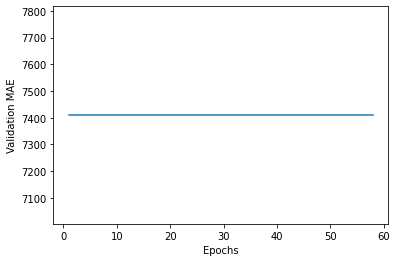

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(val_loss_history) + 1), val_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 548us/step - loss: nan - accuracy: 0.0000e+00
Test ACC :  0.0


# 첫 번째 최적화 : Optimizer 조정

### 1. Optimizer = ADAM

In [17]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [20]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=epochs,
             verbose=0, validation_split=validation_split)

In [21]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 453us/step - loss: 12754.6445 - accuracy: 1.0000
Test ACC :  1.0


In [22]:
loss_history =history.history['val_loss']

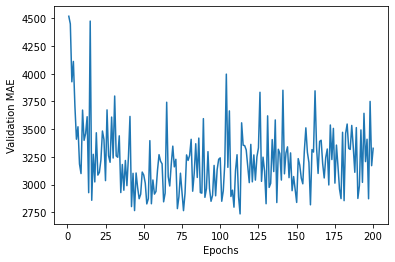

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [24]:
min(loss_history)

2734.741943359375

### 2. Optimizer = RMSProp

In [25]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [26]:
model.compile(optimizer = 'RMSProp',
             loss = 'MSE',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=epochs,
             verbose=0, validation_split=validation_split)

In [29]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 455us/step - loss: 7722.2944 - accuracy: 1.0000
Test ACC :  1.0


In [30]:
loss_history =history.history['val_loss']

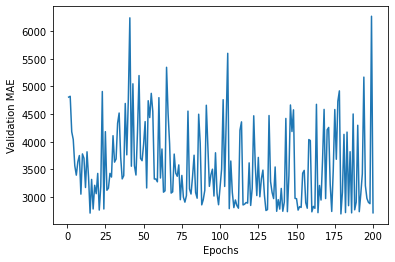

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [32]:
min(loss_history)

2694.31591796875

# 두 번째 최적화 : epochs 수 증가

In [33]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [36]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=300,
             verbose=0, validation_split=validation_split)

In [37]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 449us/step - loss: 13674.3721 - accuracy: 1.0000
Test ACC :  1.0


In [38]:
loss_history =history.history['val_loss']

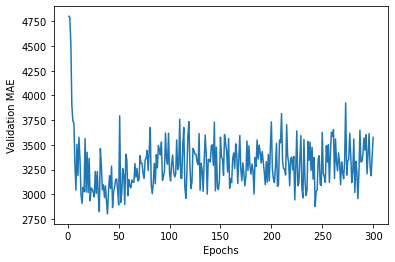

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [40]:
min(loss_history)

2802.05126953125

### RMSProp / epochs = 300

In [41]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [42]:
model.compile(optimizer = 'RMSProp',
             loss = 'MSE',
             metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=300,
             verbose=0, validation_split=validation_split)

In [45]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 444us/step - loss: 14048.9189 - accuracy: 1.0000
Test ACC :  1.0


In [46]:
loss_history =history.history['val_loss']

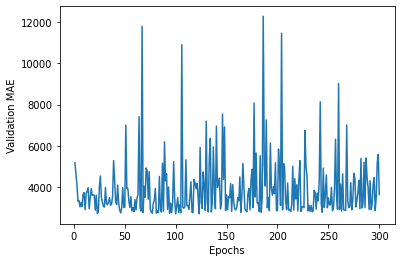

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [48]:
min(loss_history)

2700.064208984375

# 세 번째 최적화 : 학습률 조정

# 학습률 0.01

In [49]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer = optimizers.Adam(lr=0.01),
             loss = 'MSE',
             metrics=['accuracy'])

In [52]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=300,
             verbose=0, validation_split=validation_split)

In [53]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 506us/step - loss: 19085.7207 - accuracy: 1.0000
Test ACC :  1.0


In [54]:
loss_history =history.history['val_loss']

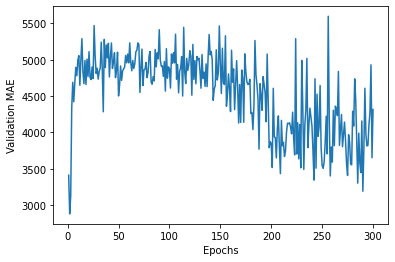

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [56]:
min(loss_history)

2879.984619140625

# 학습률 0.1

In [57]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer = optimizers.Adam(lr=0.1),
             loss = 'MSE',
             metrics=['accuracy'])

In [60]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=300,
             verbose=0, validation_split=validation_split)

In [61]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 443us/step - loss: 21001.9668 - accuracy: 1.0000
Test ACC :  1.0


In [62]:
loss_history =history.history['val_loss']

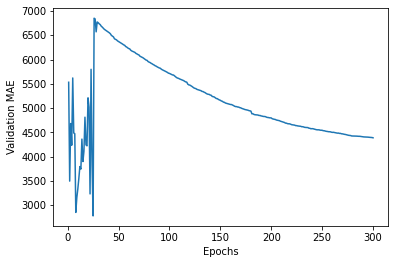

In [63]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [64]:
min(loss_history)

2780.896728515625

# 네 번째 최적화 : 은닉층 갯수 증가

# 뉴런 수 128 > 256

In [65]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(256,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 1028      
Total params: 68,868
Trainable params: 68,868
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [68]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=epochs,
             verbose=0, validation_split=validation_split)

In [69]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 509us/step - loss: 10102.0820 - accuracy: 1.0000
Test ACC :  1.0


In [70]:
loss_history =history.history['val_loss']

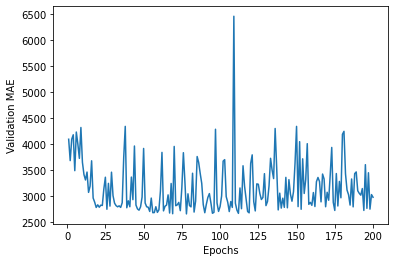

In [71]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [72]:
min(loss_history)

2655.41015625

# 뉴런 수 : 128 > 512

In [73]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(512,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [74]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               4096      
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 2052      
Total params: 268,804
Trainable params: 268,804
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [76]:
history = model.fit(X_train,Y_train,
             batch_size=batch_size, epochs=epochs,
             verbose=0, validation_split=validation_split)

In [77]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 602us/step - loss: 10574.8965 - accuracy: 1.0000
Test ACC :  1.0


In [78]:
loss_history =history.history['val_loss']

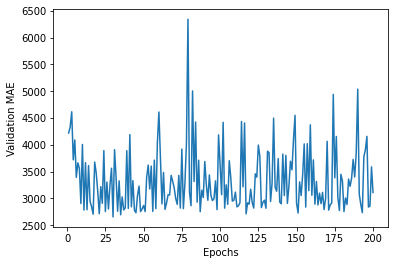

In [79]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [80]:
min(loss_history)

2654.5888671875

# 다섯 번째 최적화 : 배치 크기 조정

# 배치 크기 128 > 64

In [81]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [84]:
history = model.fit(X_train,Y_train,
             batch_size=64, epochs=epochs,
             verbose=0, validation_split=validation_split)

In [85]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 458us/step - loss: 10424.5596 - accuracy: 1.0000
Test ACC :  1.0


In [86]:
loss_history =history.history['val_loss']

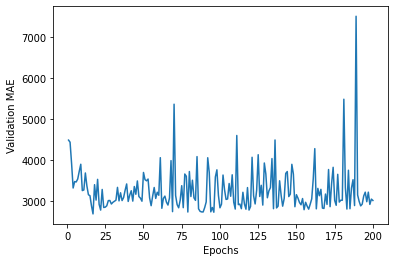

In [87]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [88]:
min(loss_history)

2679.27685546875

# 배치 크기 128 > 256

In [89]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_hidden, input_shape=(7,),
                            activation='relu'))
model.add(keras.layers.Dense(n_hidden,
                            activation='relu'))
model.add(keras.layers.Dense(nb_classes))

In [90]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 516       
Total params: 18,052
Trainable params: 18,052
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer = 'adam',
             loss = 'MSE',
             metrics=['accuracy'])

In [92]:
history = model.fit(X_train,Y_train,
             batch_size = 256, epochs=epochs,
             verbose=verbose, validation_split=validation_split)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 1593960.8750 - accuracy: 0.8905 - val_loss: 4127.2876 - val_accuracy: 0.9935
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 1007275.3125 - accuracy: 0.9928 - val_loss: 4376.5737 - val_accuracy: 0.9935
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 574067.7500 - accuracy: 0.9928 - val_loss: 5293.6865 - val_accuracy: 0.9935
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 552064.1250 - accuracy: 0.9928 - val_loss: 4789.9648 - val_accuracy: 0.9935
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 550001.5000 - accuracy: 0.9928 - val_loss: 4756.8794 - val_accuracy: 0.9935
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 548254.1875 - accuracy: 0.9928 - val_loss: 4695.7510 - val_accuracy: 0.9935
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 546452.6250 - accuracy: 0.9928 

34/34 [==============================] - 0s 1ms/step - loss: 356777.2500 - accuracy: 0.9928 - val_loss: 3004.1909 - val_accuracy: 0.9935
Epoch 56/200
34/34 [==============================] - 0s 1ms/step - loss: 355128.5938 - accuracy: 0.9928 - val_loss: 3039.7910 - val_accuracy: 0.9935
Epoch 57/200
34/34 [==============================] - 0s 1ms/step - loss: 358910.5625 - accuracy: 0.9928 - val_loss: 2985.9875 - val_accuracy: 0.9935
Epoch 58/200
34/34 [==============================] - 0s 1ms/step - loss: 355296.4062 - accuracy: 0.9928 - val_loss: 2782.8169 - val_accuracy: 0.9935
Epoch 59/200
34/34 [==============================] - 0s 1ms/step - loss: 355406.9375 - accuracy: 0.9928 - val_loss: 3160.8215 - val_accuracy: 0.9935
Epoch 60/200
34/34 [==============================] - 0s 1ms/step - loss: 354867.2500 - accuracy: 0.9879 - val_loss: 3217.8311 - val_accuracy: 0.9935
Epoch 61/200
34/34 [==============================] - 0s 1ms/step - loss: 355260.0938 - accuracy: 0.9928 - val_lo

34/34 [==============================] - 0s 1ms/step - loss: 353569.0000 - accuracy: 0.9928 - val_loss: 3321.9678 - val_accuracy: 0.9935
Epoch 110/200
34/34 [==============================] - 0s 1ms/step - loss: 354783.5312 - accuracy: 0.9927 - val_loss: 3260.1606 - val_accuracy: 0.9935
Epoch 111/200
34/34 [==============================] - 0s 1ms/step - loss: 352688.8750 - accuracy: 0.9928 - val_loss: 3074.1377 - val_accuracy: 0.9935
Epoch 112/200
34/34 [==============================] - 0s 1ms/step - loss: 353209.0938 - accuracy: 0.9928 - val_loss: 3124.3401 - val_accuracy: 0.9935
Epoch 113/200
34/34 [==============================] - 0s 1ms/step - loss: 352482.0312 - accuracy: 0.9928 - val_loss: 3001.6296 - val_accuracy: 0.9935
Epoch 114/200
34/34 [==============================] - 0s 1ms/step - loss: 353792.3125 - accuracy: 0.9928 - val_loss: 3380.3047 - val_accuracy: 0.9935
Epoch 115/200
34/34 [==============================] - 0s 1ms/step - loss: 353249.6875 - accuracy: 0.9928 - 

34/34 [==============================] - 0s 1ms/step - loss: 353469.5625 - accuracy: 0.9928 - val_loss: 3014.2393 - val_accuracy: 0.9935
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 353766.7500 - accuracy: 0.9928 - val_loss: 3215.4280 - val_accuracy: 0.9935
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 352650.1875 - accuracy: 0.9928 - val_loss: 3169.5608 - val_accuracy: 0.9935
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 353221.1875 - accuracy: 0.9928 - val_loss: 3649.9993 - val_accuracy: 0.9935
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 352621.9062 - accuracy: 0.9928 - val_loss: 3548.9932 - val_accuracy: 0.9935
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 352746.0938 - accuracy: 0.9928 - val_loss: 3431.4456 - val_accuracy: 0.9935
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 352518.3125 - accuracy: 0.9928 - 

In [93]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test ACC : ', test_acc)

85/85 [==============================] - 0s 439us/step - loss: 14144.7939 - accuracy: 1.0000
Test ACC :  1.0


In [94]:
loss_history =history.history['val_loss']

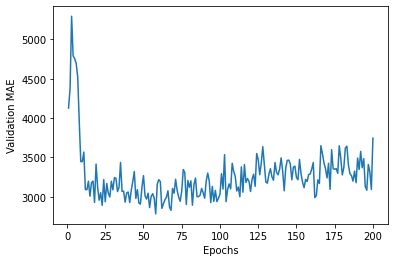

In [95]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [96]:
min(loss_history)

2782.81689453125

# 예측물 결과치

In [97]:
predict = model.predict(X_test)

In [98]:
predict

array([[  6.8587074,   6.219809 ,   2.0799735,  52.51166  ],
       [  3.9566746,   3.3164947,   1.1870883,  15.72159  ],
       [  8.774063 ,   8.068453 ,   2.5197089,  74.71294  ],
       ...,
       [ 25.776535 ,  23.439264 ,   5.4577527, 239.57793  ],
       [ 53.278862 ,  46.675797 ,  10.754485 , 523.1001   ],
       [ 25.564425 ,  23.294836 ,   5.2948494, 238.93312  ]],
      dtype=float32)

In [99]:
predict.shape

(2691, 4)